$$\begin{cases}
\frac{d^2x}{dt^2} - \mu \left(1 - (\frac{dx}{dt})^2\right)\frac{dx}{dt}+x=0 \\
x(0)=0, \dot{x}(0)=0.001
\end{cases}$$
В виде системы ОДУ:
$$\begin{cases}
\frac{dx}{dt} = y \\
\frac{dy}{dt} = \mu \left(1 - y^2\right)y-x \\
x(0)=0, y(0)=0.001
\end{cases}$$

In [1]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from ODElib import *

mu = 1000
T = 1000
u0 = Vector(0, 0.001)
ODEIOSettings.out = lambda p: print(f"\r{p*100:.5f}%" + " "*30, sep="", end="")

def f(t : float, u : Vector):
    return Vector(u[1], mu*u[1]*(1 - u[1]**2)-u[0])

def show_result(ts : list[float], us : list[Vector], name = None):
    fig = plt.figure(figsize=[10, 6])
    fig.add_subplot(1, 2, 1)
    plt.plot(ts, [u[0] for u in us], label="x(t)")
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("x")
    fig.add_subplot(1, 2, 2)
    plt.plot(ts, [u[1] for u in us], label="y(t)", color="orange")
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("y")
    if name is not None:
        plt.figtext(0.5, 1.05, name, ha="center", fontsize=16)
    plt.tight_layout()
    plt.show()

Попытка решить явным методом с шагом $h = 5 \cdot 10^{-4}$.

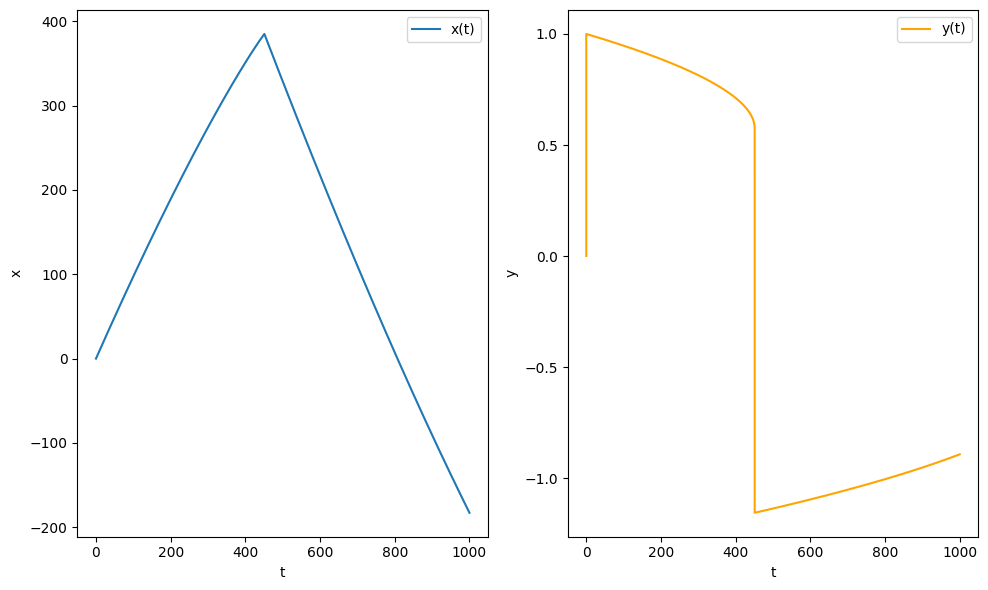

In [32]:
h = 5e-4
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]

show_result(ts, RungeKuttaMethods.explicit_3_order(f, u0, h, N))

Неявные методы Рунге-Кутты 3-го и 4-го порядков с шагом $h = 10^{-3}$.

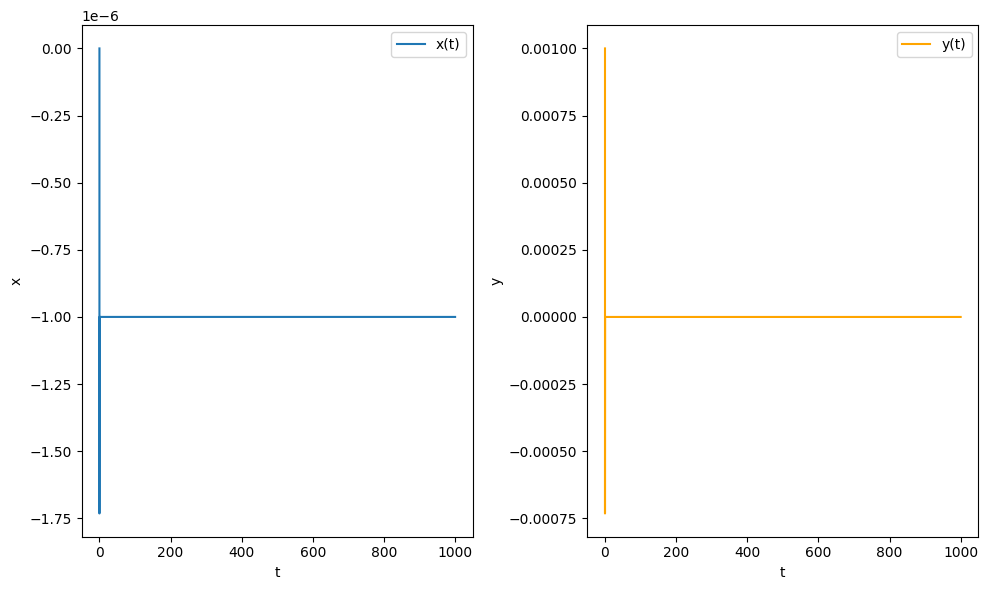

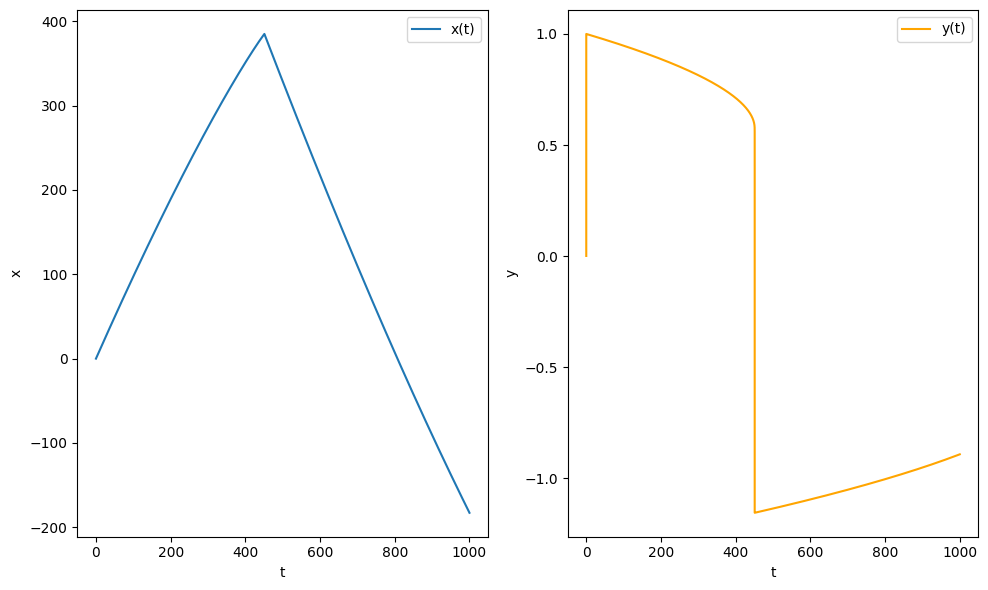

In [33]:
h = 1e-3
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]

show_result(ts, RungeKuttaMethods.implicit_3_order(f, u0, h, N))
show_result(ts, RungeKuttaMethods.implicit_4_order(f, u0, h, N))

Неявные ФДН 3-го и 4-го порядков c шагом $h = 3$, что много больше чем в неявном методе Рунге-Кутты, в качестве точек на разгонном участке были взяты значения, полученные неявным методом Рунге-Кутты 4-го порядка с шагом $\tilde{h} = 10^{-3}$.

100.00000%                              

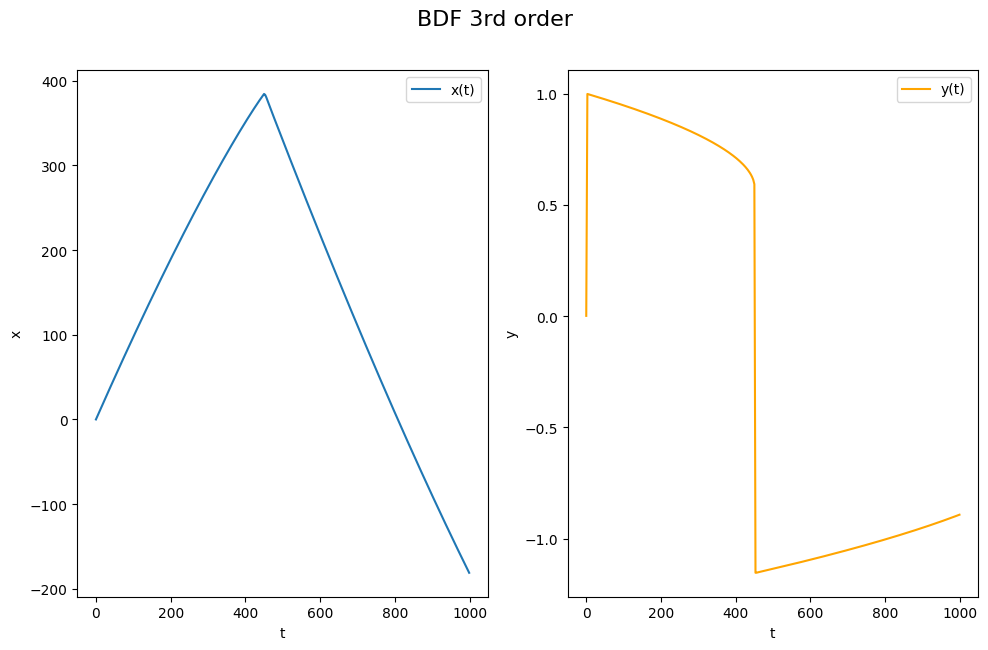

100.00000%                              

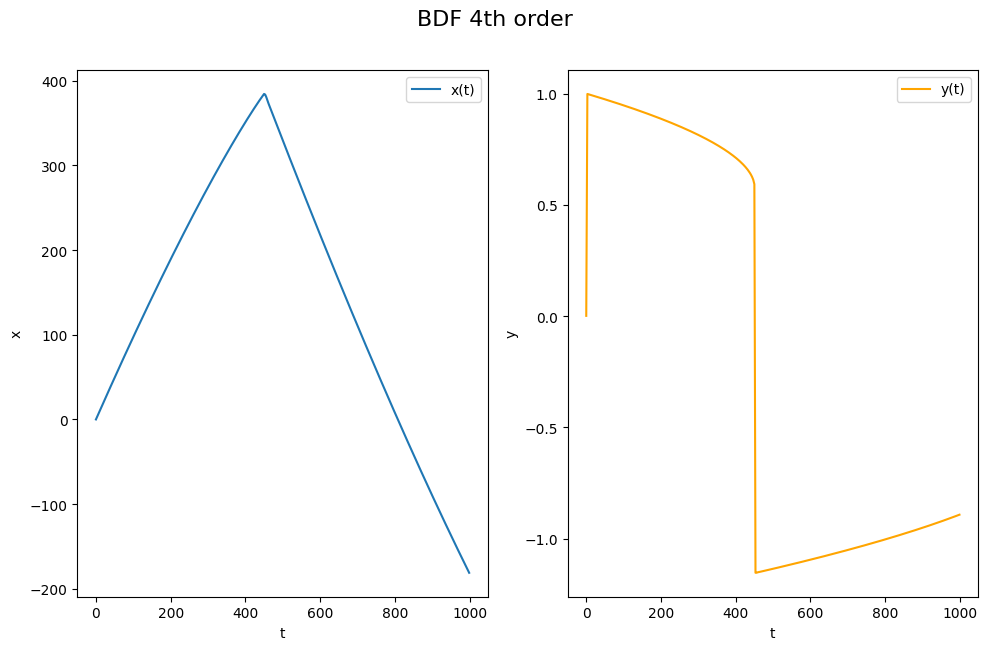

In [ ]:
h = 3
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]

# starting points
ratio = int(1e3*h)
sp = RungeKuttaMethods.implicit_4_order(f, u0, 1e-3, 3*ratio)
sp = sp[::ratio]

show_result(ts, BDF.implicit_3_order(f, sp[:3], h, N), "BDF 3rd order")
show_result(ts, BDF.implicit_4_order(f, sp, h, N), "BDF 4th order")

#12s

Методы Адамса 3-го и 4-го порядков с шагом $h = 10^{-3}$.

100.00000%                              

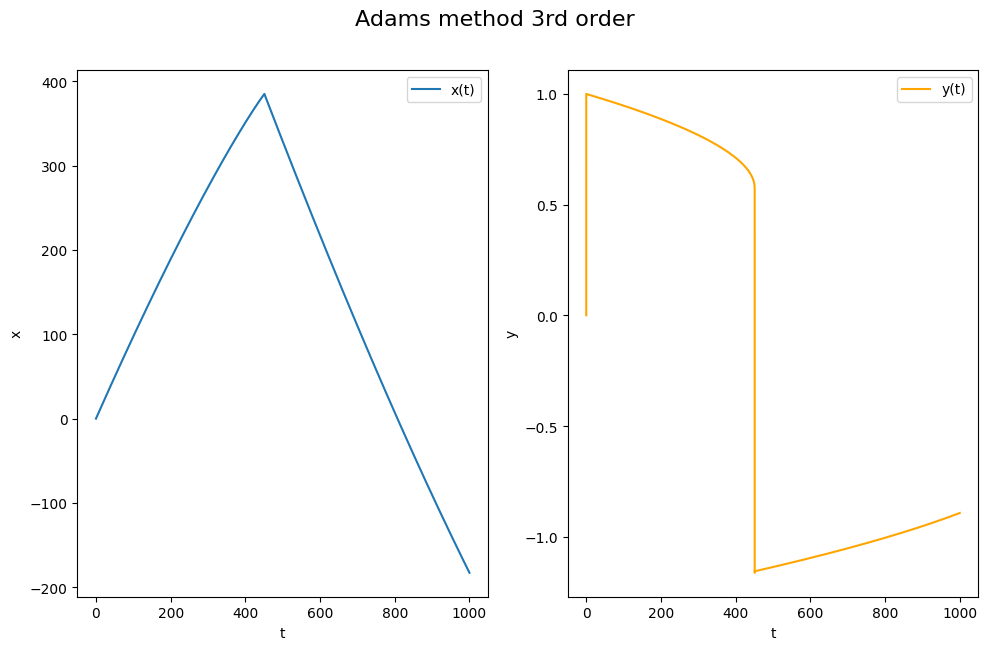

100.00000%                              

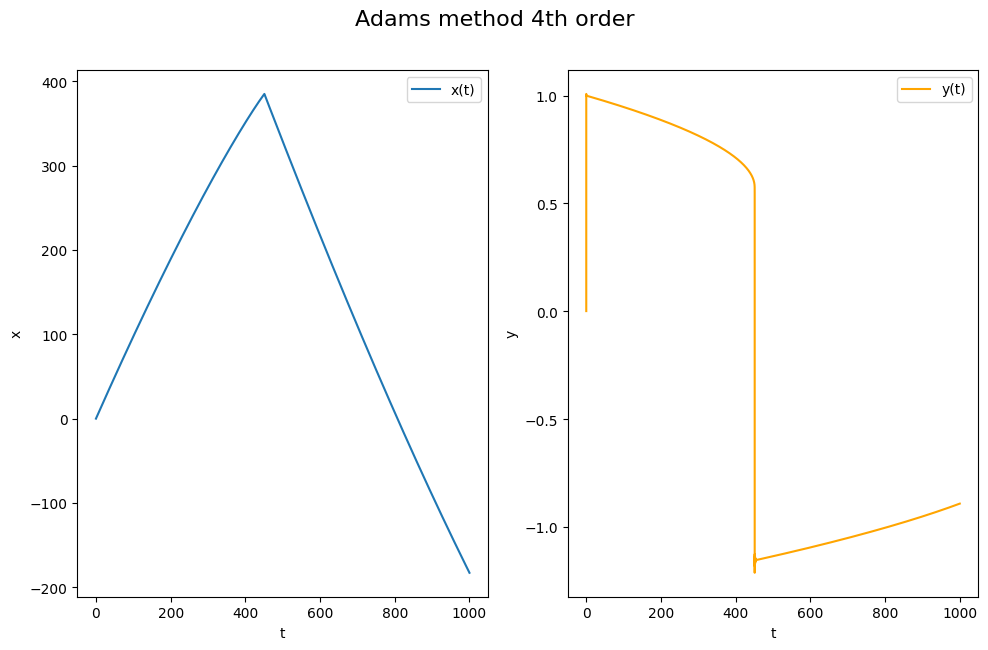

In [ ]:
h = 1e-3
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]

# starting points
ratio = int(1e3*h)
sp = RungeKuttaMethods.implicit_4_order(f, u0, 1e-3, 3*ratio)
sp = sp[::ratio]

show_result(ts, AdamsMethods.implicit_3_order(f, sp[:3], h, N), "Adams method 3rd order")
show_result(ts, AdamsMethods.implicit_4_order(f, sp, h, N), "Adams method 4th order")

#35m 24s

Методы Розенброка-Ванера 3-го и 4-го порядков 

100.00000%                              

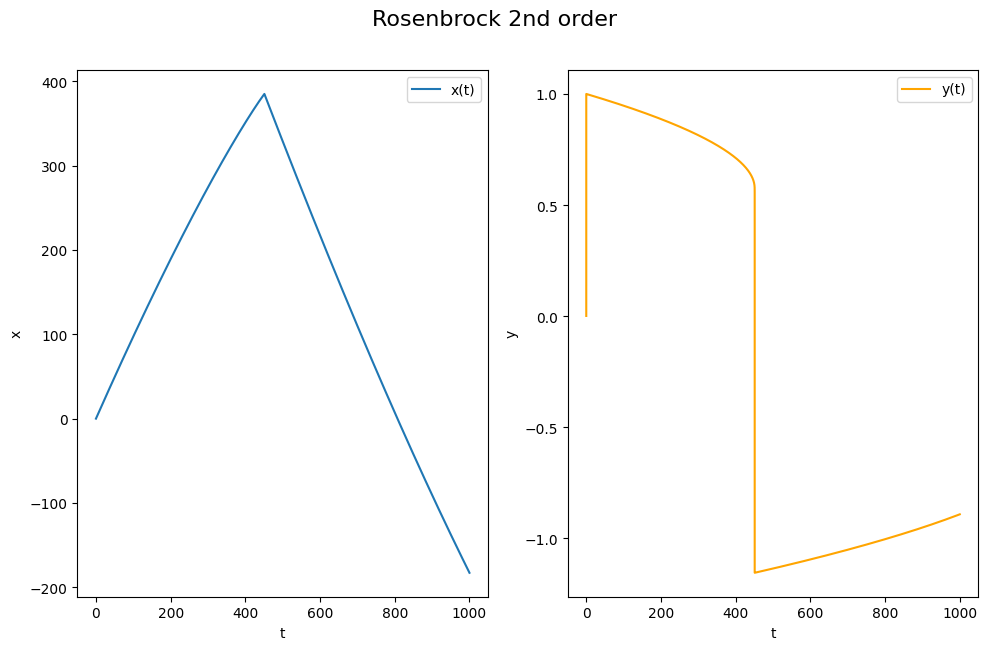

In [ ]:
h = 3e-4
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]

def auto_f(u : Vector):
    return f(0, u)

show_result(ts, RosenbrockWannerMethods.implicit_2_order(auto_f, u0, h, N), "Rosenbrock 2nd order")

#7m 52s

100.00000%                              

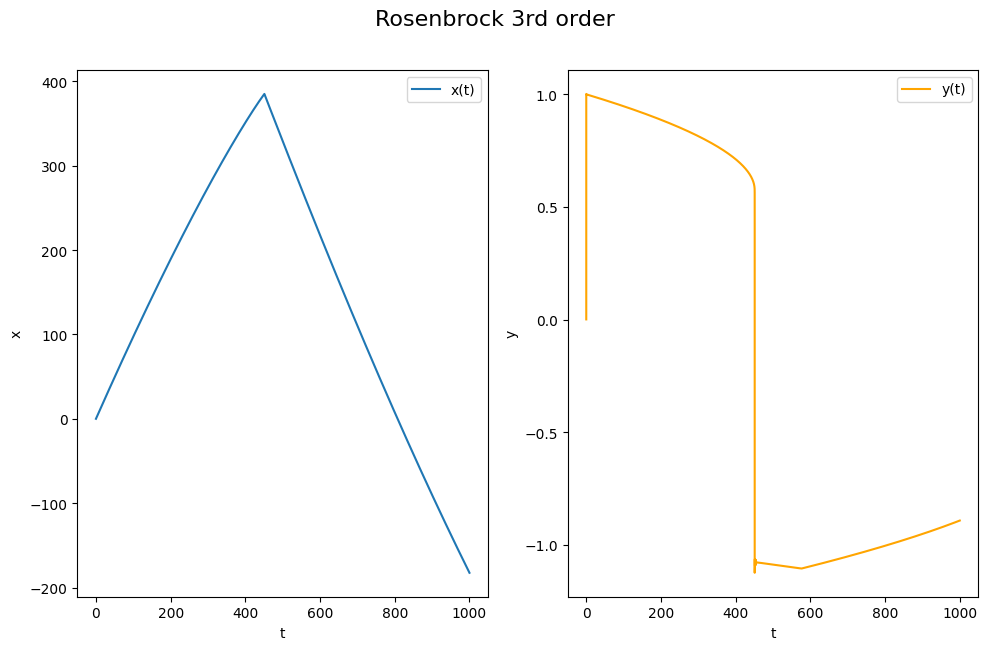

In [ ]:
h = 5e-4
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]

show_result(ts, RosenbrockWannerMethods.implicit_3_order(auto_f, u0, h, N), "Rosenbrock 3rd order")

#5m 52s